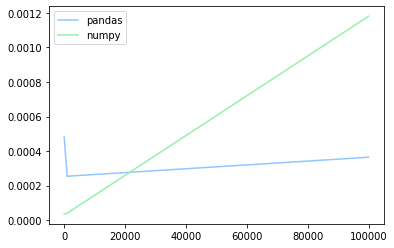

In [55]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt

arr = np.genfromtxt('household_power_consumption.txt', delimiter = ";", missing_values = '?', filling_values = np.nan, skip_header = 1, dtype = [('Date', 'U10'), ('Time', 'U8'), ('Active_power', 'f8'), ('Reactive_power', 'f8'), ('Voltage', 'f8'), ('Intensity', 'f8'), ('Sub_1', 'f8'), ('Sub_2', 'f8'), ('Sub_3', 'f8')])
arr = arr[~np.isnan(arr['Voltage'])]

df = pd.read_csv('household_power_consumption.txt', sep = ";", na_values = '?', skip_blank_lines = True, dtype = {'Global_active_power' : 'float32', 'Global_reactive_power' : 'float32', 'Voltage' : 'float32', 'Global_intensity' : 'float32', 'Sub_metering_1' : 'float32', 'Sub_metering_2' : 'float32', 'Sub_metering_3' : 'float32'}).dropna()
df

list1 = [10, 1000, 100000]
list2 = [timeit.timeit('df.head(10).Global_active_power.mean()', globals=globals(), number=1), timeit.timeit('df.head(1000).Global_active_power.mean()', globals=globals(), number=1), timeit.timeit('df.head(100000).Global_active_power.mean()', globals=globals(), number=1)]

list4 = [timeit.timeit('np.mean(arr[\'Active_power\'][:10])', globals=globals(), number=1), timeit.timeit('np.mean(arr[\'Active_power\'][:1000])', globals=globals(), number=1), timeit.timeit('np.mean(arr[\'Active_power\'][:100000])', globals=globals(), number=1)]

plt.plot(list1, list2, label = 'pandas')
plt.plot(list1, list4, label = 'numpy')
plt.legend()

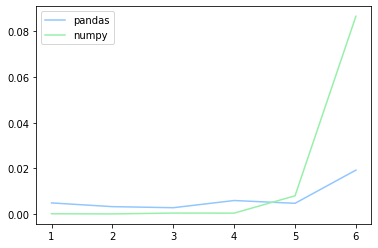

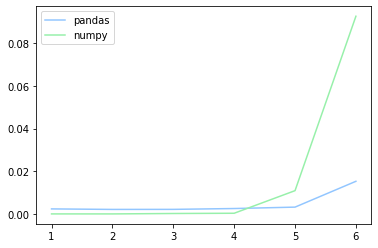

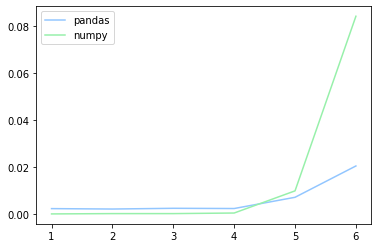

In [65]:
list_l = []
list_p = []
list_n = []

def plot_func(nump_f, pand_f):
    list_l = []
    list_p = []
    list_n = []
    for i in range (1, 7):
        list_l.append(i)
        i = 10**i
        list_p.append(timeit.timeit(pand_f.format(i), globals=globals(), number=10))
        list_n.append(timeit.timeit(nump_f.format(i), globals=globals(), number=10))

    plt.plot(list_l, list_p, label = 'pandas')
    plt.plot(list_l, list_n, label = 'numpy')
    plt.legend()
    plt.show()
    
nump_f = ['np.mean(arr[\'Active_power\'][:{}])', 'np.max(arr[\'Active_power\'][:{}])', 'np.min(arr[\'Active_power\'][:{}])']
pand_f = ['df.head({}).Global_active_power.mean()', 'df.head({}).Global_active_power.max()', 'df.head({}).Global_active_power.min()']

for s in range(len(nump_f)):
    plot_func(nump_f[s], pand_f[s])